<a href="https://colab.research.google.com/github/arturocolint/Simulaci-n-1/blob/main/GENERADOR%20CONGRUENCIAL%20PARA%2010000%20NUMEROS%20ALEATORIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media final: 0.495
Varianza final: 0.08332500000000359
Tabla de números generados (primeras 10 iteraciones):
+-----------+---------+-------------------+
| Iteración | Semilla | Valor Normalizado |
+-----------+---------+-------------------+
|     1     |    5    |       0.94        |
|     2     |   94    |       0.03        |
|     3     |    3    |       0.32        |
|     4     |   32    |       0.81        |
|     5     |   81    |        0.5        |
|     6     |   50    |       0.39        |
|     7     |   39    |       0.48        |
|     8     |   48    |       0.77        |
|     9     |   77    |       0.26        |
|    10     |   26    |       0.95        |
|    11     |   95    |       0.84        |
|    12     |   84    |       0.93        |
|    13     |   93    |       0.22        |
|    14     |   22    |       0.71        |
|    15     |   71    |        0.4        |
|    16     |   40    |       0.29        |
|    17     |   29    |       0.38        |
|    18    

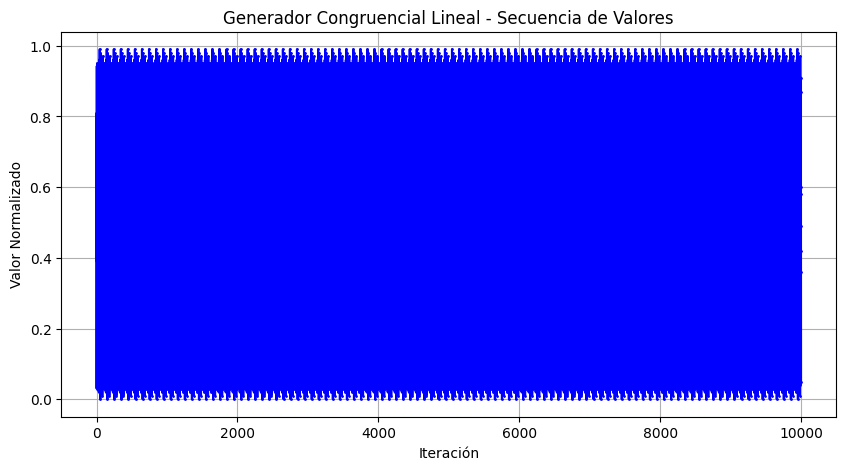

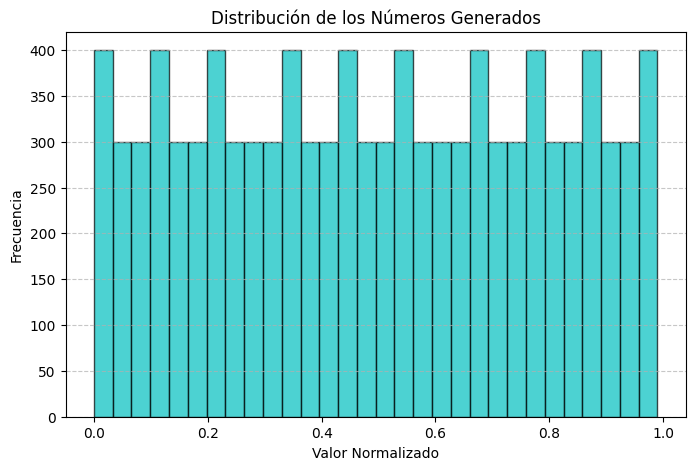

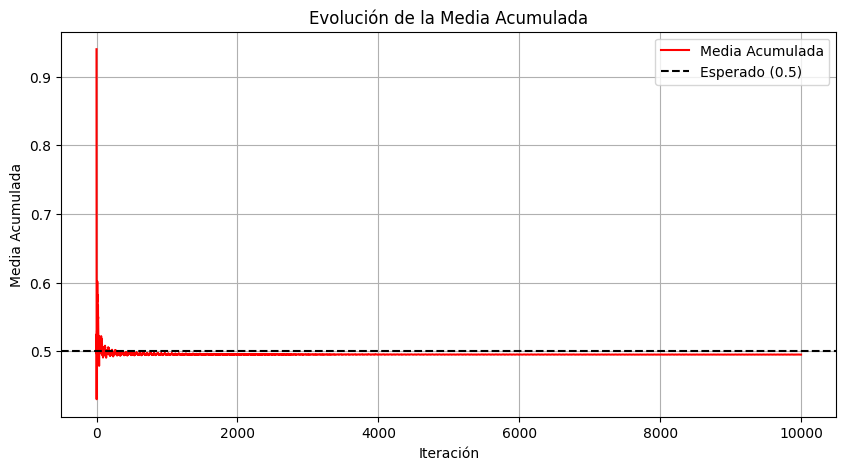

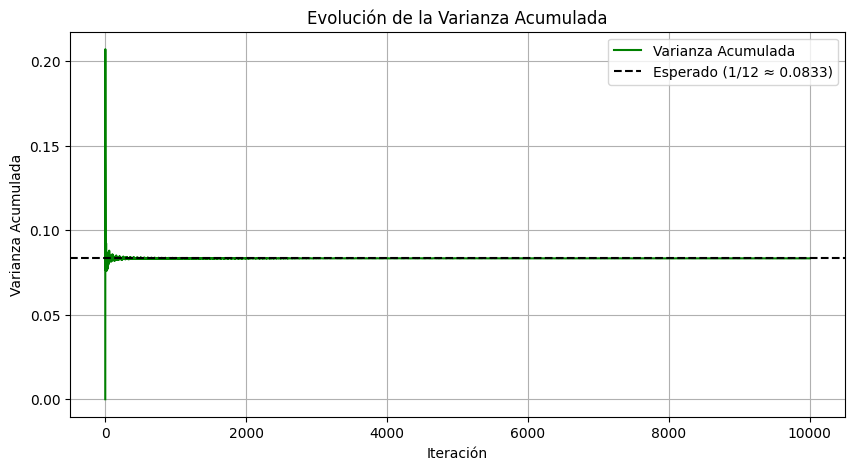

In [3]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

# Parámetros del generador
a = 81
c = 89
m = 100
x0 = 5

# Función para generar números con el método de congruencia lineal
def generador_congruenciaL(a, c, m, x0, n):
    numeros = []
    lista = []  # Lista para almacenar los valores normalizados
    for i in range(n):
        x = (a * x0 + c) % m
        normalizado = x / m
        numeros.append([i + 1, x0, normalizado])
        lista.append(normalizado)  # Guardamos en la lista para graficar
        x0 = x  # Actualizar la semilla
    return numeros, lista

# Número de iteraciones
n = 10000
resultados, lista = generador_congruenciaL(a, c, m, x0, n)

# Cálculo de media y varianza acumuladas
medias_acumuladas = []
varianzas_acumuladas = []

suma = 0
suma_cuadrados = 0

for i in range(1, n + 1):
    suma += lista[i - 1]
    suma_cuadrados += lista[i - 1] ** 2
    media_acumulada = suma / i
    varianza_acumulada = (suma_cuadrados / i) - (media_acumulada ** 2) if i > 1 else 0  # Evita división por 0
    medias_acumuladas.append(media_acumulada)
    varianzas_acumuladas.append(varianza_acumulada)

# Imprimir la media y varianza final
print(f"Media final: {medias_acumuladas[-1]}")
print(f"Varianza final: {varianzas_acumuladas[-1]}")

# Mostrar solo las primeras 1000 iteraciones en la tabla para evitar sobrecarga de impresión
headers = ["Iteración", "Semilla", "Valor Normalizado"]
print("Tabla de números generados (primeras 10 iteraciones):")
print(tabulate(resultados[:1000], headers=headers, tablefmt="pretty"))

# Gráfica de la secuencia de valores normalizados
plt.figure(figsize=(10, 5))
plt.plot(lista, marker='o', linestyle='-', color='b', markersize=1)
plt.xlabel("Iteración")
plt.ylabel("Valor Normalizado")
plt.title("Generador Congruencial Lineal - Secuencia de Valores")
plt.grid()
plt.show()

# Gráfica de distribución (histograma)
plt.figure(figsize=(8, 5))
plt.hist(lista, bins=30, color='c', edgecolor='black', alpha=0.7)
plt.xlabel("Valor Normalizado")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Números Generados")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfica de la media acumulada
plt.figure(figsize=(10, 5))
plt.plot(medias_acumuladas, color='r', label="Media Acumulada")
plt.axhline(y=0.5, color='k', linestyle='--', label="Esperado (0.5)")
plt.xlabel("Iteración")
plt.ylabel("Media Acumulada")
plt.title("Evolución de la Media Acumulada")
plt.legend()
plt.grid()
plt.show()

# Gráfica de la varianza acumulada
plt.figure(figsize=(10, 5))
plt.plot(varianzas_acumuladas, color='g', label="Varianza Acumulada")
plt.axhline(y=1/12, color='k', linestyle='--', label="Esperado (1/12 ≈ 0.0833)")
plt.xlabel("Iteración")
plt.ylabel("Varianza Acumulada")
plt.title("Evolución de la Varianza Acumulada")
plt.legend()
plt.grid()
plt.show()
